# Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from matplotlib import pyplot as plt

# Import Dataset

In [2]:
dataset = pd.read_csv('InjecDataset.csv')

In [3]:
dataset

,ID,Pressure(front),Pressure(back),Temp,Label,thick,width,Tensile Strength (MPa),Deflection
0,1,NaN,56.0,240,W,2.993,12.60,24.22,NaN
1,2,NaN,NaN,240,W,2.965,12.61,NaN,NaN
2,3,NaN,NaN,240,W,3.002,12.61,23.69,41.8
3,4,NaN,NaN,240,W,2.993,12.68,23.76,42.0
4,5,NaN,NaN,240,W,2.963,12.67,24.42,42.2
...,...,...,...,...,...,...,...,...,...
169,4,65.0,56.0,240,Red,NaN,NaN,NaN,NaN
170,5,65.0,56.0,240,Red,NaN,NaN,NaN,NaN
171,23,42.0,40.0,240,Red,NaN,NaN,NaN,NaN
172,28,48.0,49.0,240,Red,NaN,NaN,NaN,NaN


In [4]:
Labels = {'W': 0.0, 'Red': 1.0, 'Green': 2.0, 'Red/Green': 3.0}
dataset['Label'] = dataset['Label'].map(Labels)
pd.DataFrame(dataset['Label'])

,Label
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
169,1.0
170,1.0
171,1.0
172,1.0


# Using the Mean strategy to impute data

In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(dataset.iloc[:, 1:9])
dataset.iloc[:, 1:9] = imputer.transform(dataset.iloc[:, 1:9])

## Only using Pressure(Front), Pressure(Back) and Temp as input values

In [6]:
#Setup Tensile Test
Xt = dataset.iloc[:, 1:4].values 
Yt = dataset.iloc[:, -2].values
#Setup Deflection
Xd = dataset.iloc[:, 1:4].values
Yd= dataset.iloc[:,-1].values

# Splitting Test and Train Data

In [7]:
from sklearn.model_selection import train_test_split
Xt_train, Xt_test, Yt_train, Yt_test = train_test_split(Xt, Yt, test_size = 0.2, random_state = 1)
Xd_train, Xd_test, Yd_train, Yd_test = train_test_split(Xd, Yd, test_size = 0.2, random_state = 1)

### Perform Feature Scaling

In [8]:
Xd

array([[ 54.       ,  56.       , 240.       ],
       [ 54.       ,  48.8627451, 240.       ],
       [ 54.       ,  48.8627451, 240.       ],
       [ 54.       ,  48.8627451, 240.       ],
       [ 54.       ,  48.8627451, 240.       ],
       [ 54.       ,  48.8627451, 240.       ],
       [ 54.       ,  48.8627451, 240.       ],
       [ 54.       ,  48.8627451, 240.       ],
       [ 54.       ,  48.8627451, 240.       ],
       [ 54.       ,  48.8627451, 240.       ],
       [ 54.       ,  48.8627451, 240.       ],
       [ 54.       ,  48.8627451, 240.       ],
       [ 54.       ,  48.8627451, 240.       ],
       [ 54.       ,  48.8627451, 240.       ],
       [ 54.       ,  48.8627451, 240.       ],
       [ 54.       ,  48.8627451, 240.       ],
       [ 54.       ,  48.8627451, 240.       ],
       [ 54.       ,  48.8627451, 240.       ],
       [ 54.       ,  48.8627451, 240.       ],
       [ 54.       ,  48.8627451, 240.       ],
       [ 54.       ,  48.8627451, 240.  

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xt_train[:, :] = sc.fit_transform(Xt_train[:, :])
Xt_test[:, :] = sc.transform(Xt_test[:, :])
Xd_train[:, :] = sc.fit_transform(Xd_train[:, :])
Xd_test[:, :] = sc.transform(Xd_test[:, :])

# Attempt SVC, Logitistic Regression

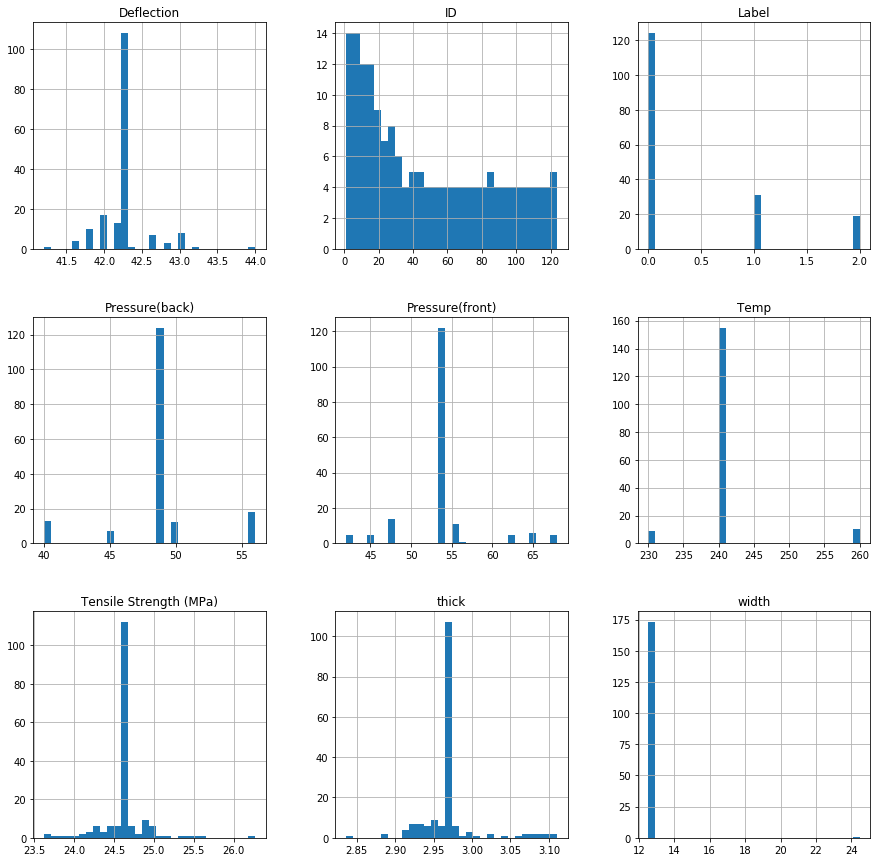

In [10]:
dataset.hist(bins=30,figsize=(15,15))
plt.show()

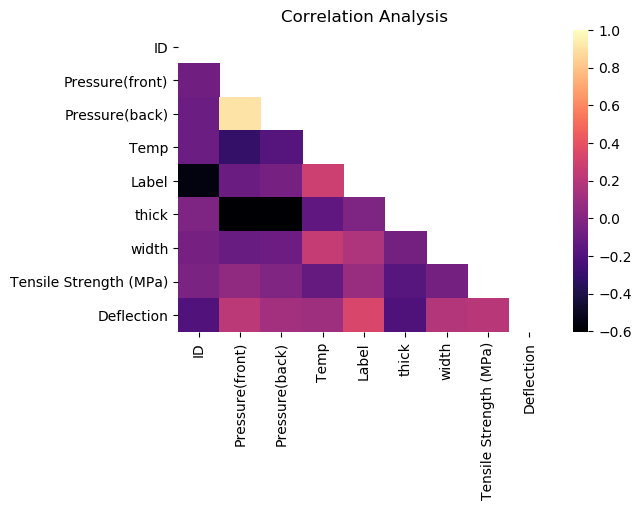

Tensile Strength (MPa)    1.000000
Deflection                0.200720
Label                     0.082306
Pressure(front)           0.050663
Pressure(back)           -0.013435
ID                       -0.031712
width                    -0.062640
Temp                     -0.120207
thick                    -0.173836
Name: Tensile Strength (MPa), dtype: float64

In [11]:
#Use correlation matrix to get an understanding of the data's relationships
corr_matrix = dataset.corr()

mask = np.triu(np.ones_like(corr_matrix,dtype = bool)) # Only keep the upper triangle of an array.
from seaborn import heatmap
plt.figure(dpi=100)
plt.title('Correlation Analysis')
heatmap(corr_matrix,mask=mask,annot=False,lw=0,linecolor='white',cmap='magma',fmt = "0.2f")
plt.xticks(rotation=90)
plt.yticks(rotation = 0)
plt.show()
#Check the relationships numerically
corr_matrix["Tensile Strength (MPa)"].sort_values(ascending=False)

In [12]:
#Check Relationship Numberically
corr_matrix["Deflection"].sort_values(ascending=False)

Deflection                1.000000
Label                     0.341548
Pressure(front)           0.221954
Tensile Strength (MPa)    0.200720
width                     0.190768
Pressure(back)            0.123119
Temp                      0.109745
ID                       -0.197515
thick                    -0.204527
Name: Deflection, dtype: float64

The Deflection correlated with Pressure(Front) 0.22, Pressure(Back) 0.12, Temp 0.11
The  Tensile Strength correlated with Pressure(front) 0.05, and NEGATIVE correlation with back pressure and Temp

# Using Random Forest

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


In [81]:
# Tensile Test
rf=RandomForestRegressor(n_estimators=30)
rf.fit(Xt_train,Yt_train)
Yt_pred = rf.predict(Xt_test)
score = r2_score(Yt_test,Yt_pred)
print('R2 Score = ', score)
score=mean_squared_error(Yt_pred,Yt_test)
print(score)

R2 Score =  -0.010156625091404026
0.10318703215650908


In [80]:
#Defelction
rf=RandomForestRegressor(n_estimators=30)
rf.fit(Xd_train,Yd_train)
Yd_pred = rf.predict(Xd_test)
score = r2_score(Yd_test,Yd_pred)
print('R2 Score = ', score)
score=mean_squared_error(Yd_pred,Yd_test)
print(score)

R2 Score =  0.38826463551793966
0.10553684508603108


# Using Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

In [78]:
regressor = LinearRegression()
regressor.fit(Xt_train, Yt_train)
Yt_pred = regressor.predict(Xt_test)
score = r2_score(Yt_test,Yt_pred)
print('R2 Score = ', score)
score=mean_squared_error(Yt_pred,Yt_test)
print(score)

R2 Score =  0.005375445230179521
0.10160043835519103


In [79]:
regressor = LinearRegression()
regressor.fit(Xd_train, Yd_train)
Yd_pred = regressor.predict(Xd_test)
score = r2_score(Yd_test,Yd_pred)
print('R2 Score = ', score)
score=mean_squared_error(Yd_pred,Yd_test)
print(score)

R2 Score =  0.1853615115565901
0.14054177827165973


# Using SVR Trees

In [69]:
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error 
Tregressor = SVR(kernel = 'sigmoid')
Tregressor.fit(Xt_train, Yt_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='sigmoid', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [74]:
#Tensile Test Prediction
NewXt=[[55,54,240]] 
ScaledNewXt=sc.fit_transform(NewXt)
Result=Tregressor.predict(ScaledNewXt) 
print("The Tensile Strength will be",Result, "MPa")
Result=Tregressor.predict(Xt_test)
avgError=np.average(Result-Yt_test)
print(avgError)
Score=mean_squared_error(Result,Yt_test)
print(Score)

The Tensile Strength will be [24.27329136] MPa
-0.10347621999330454
0.7260565968770627


In [21]:
Dregressor = SVR(kernel = 'sigmoid')
Dregressor.fit(Xd_train, Yd_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='sigmoid', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [82]:
#Beam Bending
NewXd=[[55,54,240]] 
ScaledNewXd=sc.fit_transform(NewXd)
Result=Dregressor.predict(ScaledNewXd) 
print("The deflection will be",Result, "mm")
Result=Dregressor.predict(Xd_test)
avgError=np.average(Result-Yd_test)
print(avgError)
Score=mean_squared_error(Result,Yd_test)
print(Score)

The deflection will be [41.70092536] mm
-0.2589324512753994
0.8945172035510236


# Using ANN Regressor Tensile

In [47]:
InjMachineT = tf.keras.models.Sequential()
InjMachineT.add(tf.keras.layers.Dense(units=5, input_dim=3, activation='relu'))
InjMachineT.add(tf.keras.layers.Dense(units=2, activation='relu'))
InjMachineT.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [48]:
InjMachineT.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
InjMachineT.fit(Xt_train, Yt_train, validation_split=0.33, batch_size = 32, epochs = 100, verbose=1)

Epoch 1/100
3/3 [==============================] - 1s 276ms/step - loss: -10.4884 - accuracy: 0.0000e+00 - val_loss: -12.2168 - val_accuracy: 0.0000e+00
Epoch 2/100
3/3 [==============================] - 0s 30ms/step - loss: -11.0112 - accuracy: 0.0000e+00 - val_loss: -12.7086 - val_accuracy: 0.0000e+00
Epoch 3/100
3/3 [==============================] - 0s 38ms/step - loss: -11.5113 - accuracy: 0.0000e+00 - val_loss: -13.2061 - val_accuracy: 0.0000e+00
Epoch 4/100
3/3 [==============================] - 0s 46ms/step - loss: -12.0565 - accuracy: 0.0000e+00 - val_loss: -13.7040 - val_accuracy: 0.0000e+00
Epoch 5/100
3/3 [==============================] - 0s 41ms/step - loss: -12.6018 - accuracy: 0.0000e+00 - val_loss: -14.2070 - val_accuracy: 0.0000e+00
Epoch 6/100
3/3 [==============================] - 0s 29ms/step - loss: -13.1417 - accuracy: 0.0000e+00 - val_loss: -14.7113 - val_accuracy: 0.0000e+00
Epoch 7/100
3/3 [==============================] - 0s 29ms/step - loss: -13.6421 - accu

2/2 [==============================] - 0s 7ms/step - loss: -149.3402 - accuracy: 0.0000e+00
[-149.34024047851562, 0.0]
The average error for tensile ANN regressor is  -23.685362753578342


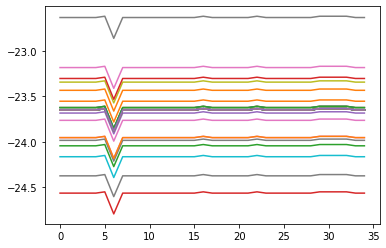

In [51]:
Yt_pred = InjMachineT.predict(Xt_test)
Error=Yt_pred-Yt_test
import matplotlib.pyplot as plt
plt.plot(range(len(Error)), Error)
AverageError= np.average(Error)
print('The average error for tensile ANN regressor is ',AverageError)
Result=InjMachineT.evaluate(Xt_test,Yt_test)
print(Result)

# Using ANN Regressor Deflection

In [31]:
InjMachineD = tf.keras.models.Sequential()
InjMachineD.add(tf.keras.layers.Dense(units=5, input_dim=3, activation='relu'))
InjMachineD.add(tf.keras.layers.Dense(units=2, activation='relu'))
InjMachineD.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [32]:
InjMachineD.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
InjMachineD.fit(Xd_train, Yd_train, validation_split=0.33, batch_size = 32, epochs = 100, verbose=1)

Epoch 1/10
3/3 [==============================] - 1s 131ms/step - loss: -16.4010 - accuracy: 0.0000e+00 - val_loss: -17.1086 - val_accuracy: 0.0000e+00
Epoch 2/10
3/3 [==============================] - 0s 40ms/step - loss: -17.1777 - accuracy: 0.0000e+00 - val_loss: -17.8299 - val_accuracy: 0.0000e+00
Epoch 3/10
3/3 [==============================] - 0s 37ms/step - loss: -17.9452 - accuracy: 0.0000e+00 - val_loss: -18.5583 - val_accuracy: 0.0000e+00
Epoch 4/10
3/3 [==============================] - 0s 32ms/step - loss: -18.7612 - accuracy: 0.0000e+00 - val_loss: -19.2923 - val_accuracy: 0.0000e+00
Epoch 5/10
3/3 [==============================] - 0s 35ms/step - loss: -19.5458 - accuracy: 0.0000e+00 - val_loss: -20.0457 - val_accuracy: 0.0000e+00
Epoch 6/10
3/3 [==============================] - 0s 35ms/step - loss: -20.3811 - accuracy: 0.0000e+00 - val_loss: -20.8122 - val_accuracy: 0.0000e+00
Epoch 7/10
3/3 [==============================] - 0s 36ms/step - loss: -21.2041 - accuracy: 0

The average error for tensile ANN regressor is  -41.29411444964347
2/2 [==============================] - 0s 5ms/step - loss: -19.6926 - accuracy: 0.0000e+00
[-19.692630767822266, 0.0]


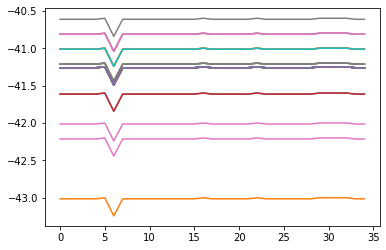

In [52]:
Yd_pred = InjMachineT.predict(Xd_test)
Error=Yd_pred-Yd_test

import matplotlib.pyplot as plt
plt.plot(range(len(Error)), Error)
AverageError= np.average(Error)
print('The average error for tensile ANN regressor is ',AverageError)
Result=InjMachineD.evaluate(Xd_test,Yd_test)
print(Result)

In [46]:
# Prediction for Tensile Strength
NewXt=[[54,54,240]]
ScaledNewXt=sc.fit_transform(NewXt)
Prediction=InjMachineT.predict(ScaledNewXt)
print('The prediction for tensile ANN regressor is ',Prediction)


The prediction for tensile ANN regressor is  [[1.8961986e-14]]


In [42]:
# Prediction for Tensile Strength
NewXd=[[55,54,240]]
ScaledNewXd=sc.fit_transform(NewXd)
Prediction=InjMachineD.predict(ScaledNewXd)
print('The prediction for tensile ANN regressor is ',Prediction)

The prediction for tensile ANN regressor is  [[0.5347411]]
